<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1.5</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>
<li><strong>Pregunta:</strong> 5<br /><br /></li>
</ul>

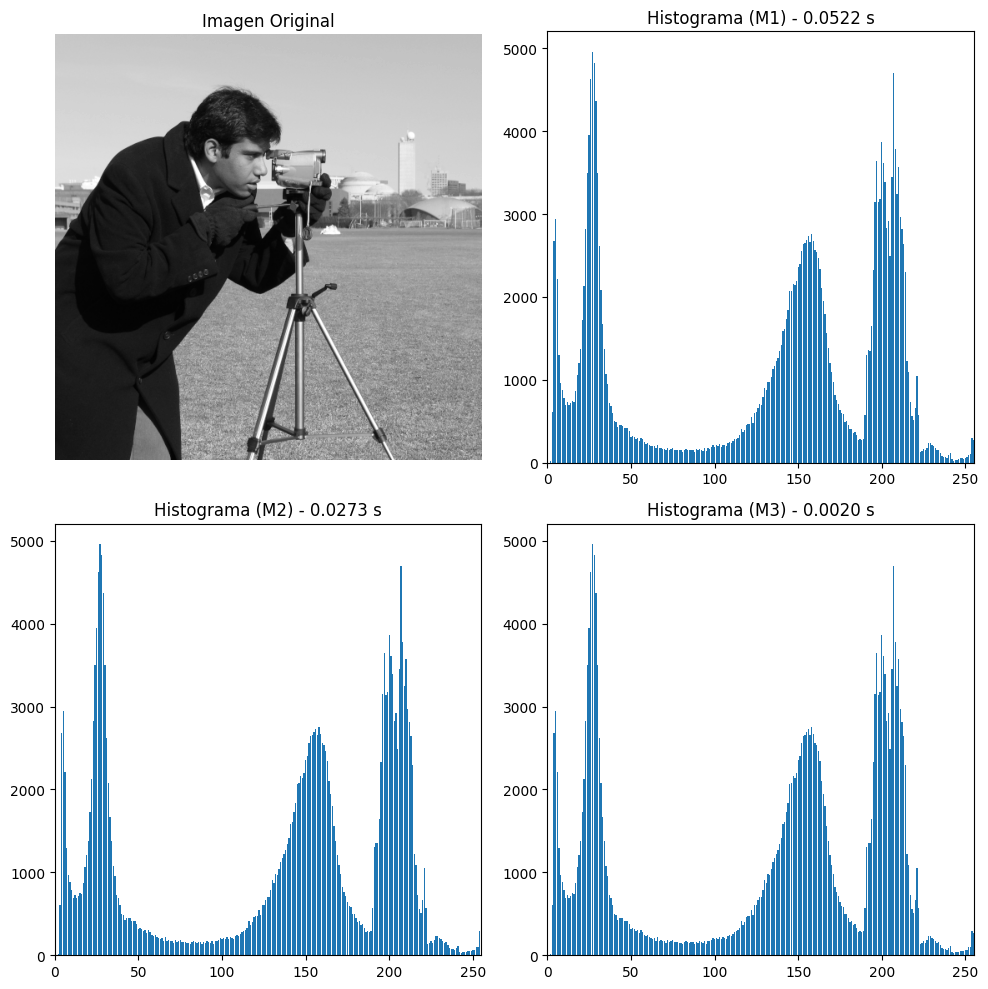

Tiempo de ejecución M1: 0.0522 s
Tiempo de ejecución M2: 0.0273 s
Tiempo de ejecución M3: 0.0020 s


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from skimage import data

# Usar una imagen de ejemplo de skimage
image = data.camera()

# Mostrar la imagen original
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Método 1: Recorrido manual para calcular el histograma
h1 = np.zeros(256)
m, n = image.shape
start_time = time.time()
for x in range(m):
    for y in range(n):
        h1[image[x, y]] += 1
time_m1 = time.time() - start_time

plt.subplot(2, 2, 2)
plt.bar(range(256), h1)
plt.title(f'Histograma (M1) - {time_m1:.4f} s')
plt.xlim([0, 255])

# Método 2: Operaciones vectorizadas
h2 = np.zeros(256)
start_time = time.time()
for i in range(256):
    h2[i] = np.sum(image == i)
time_m2 = time.time() - start_time

plt.subplot(2, 2, 3)
plt.bar(range(256), h2)
plt.title(f'Histograma (M2) - {time_m2:.4f} s')
plt.xlim([0, 255])

# Método 3: Usando una función incorporada
start_time = time.time()
h3, bins = np.histogram(image, bins=256, range=[0, 256])
time_m3 = time.time() - start_time

plt.subplot(2, 2, 4)
plt.bar(range(256), h3)
plt.title(f'Histograma (M3) - {time_m3:.4f} s')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

# Resultados de los tiempos de ejecución
print(f"Tiempo de ejecución M1: {time_m1:.4f} s")
print(f"Tiempo de ejecución M2: {time_m2:.4f} s")
print(f"Tiempo de ejecución M3: {time_m3:.4f} s")


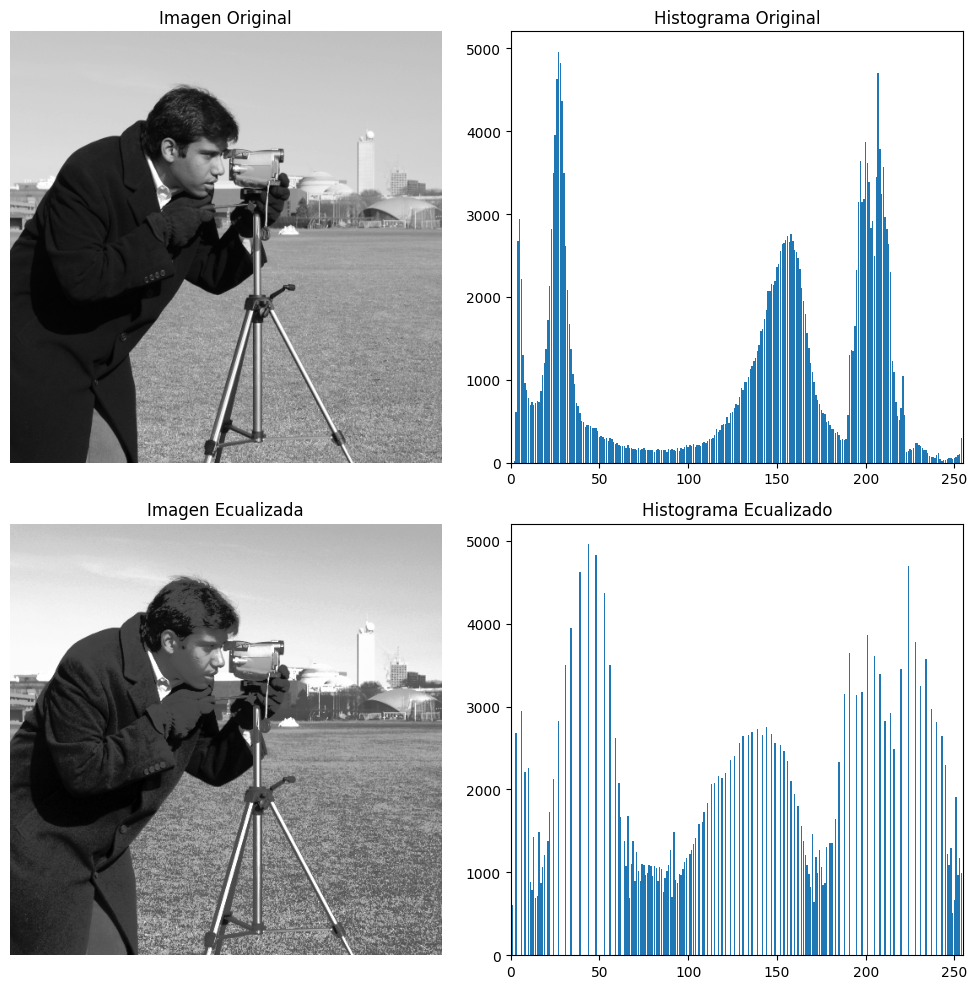

In [6]:

# Usar la misma imagen de ejemplo para la ecualización
image = data.camera()

# Mostrar la imagen original
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Calcular el histograma de la imagen original
hist = np.zeros(256)
for i in range(256):
    hist[i] = np.sum(image == i)

plt.subplot(2, 2, 2)
plt.bar(range(256), hist)
plt.title('Histograma Original')
plt.xlim([0, 255])

# Calcular la distribución acumulada
cdf = np.cumsum(hist) / (image.size)

# Aplicar la técnica de ecualización
image_equalized = np.round(cdf[image] * 255).astype(np.uint8)

plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Calcular el histograma de la imagen ecualizada
hist_eq = np.zeros(256)
for i in range(256):
    hist_eq[i] = np.sum(image_equalized == i)

plt.subplot(2, 2, 4)
plt.bar(range(256), hist_eq)
plt.title('Histograma Ecualizado')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()
